# Project: Helecious
Developed by:
* Habeeb Idrees
* Ahmad Alsaqqa

# Dataset import

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

/home/hb/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
path = 'dataset.csv'
dataset = pd.read_csv(path)

In [3]:
dataset

,date,week_day,store_id,item_name,item_id,sales,returned
0,2020-06-28,Sunday,ام عبدالعزيز العامري,جرانولا,1,2,0
1,2020-06-28,Sunday,ام عبدالعزيز العامري,لبيتو,2,0,0
2,2020-06-28,Sunday,ام عبدالعزيز العامري,جرينتا,3,0,0
3,2020-06-28,Sunday,ام عبدالعزيز العامري,تشكن بف,4,0,0
4,2020-06-28,Sunday,ام عبدالعزيز العامري,تبولة,5,0,0
...,...,...,...,...,...,...,...
10875,2021-04-01,Thursday,متنوعون,تشكن بف,4,0,0
10876,2021-04-01,Thursday,متنوعون,تبولة,5,1,0
10877,2021-04-01,Thursday,متنوعون,باستا,6,1,0
10878,2021-04-01,Thursday,متنوعون,س دجاج,7,0,0


Displaying demo of the dataset: 



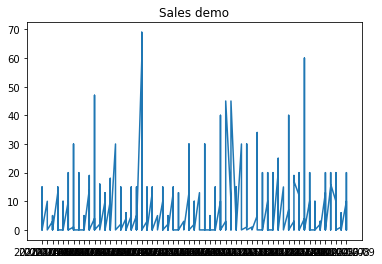

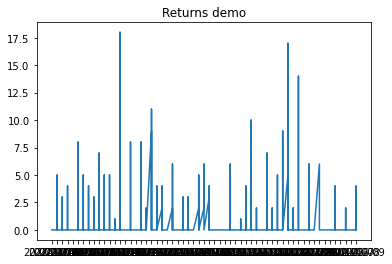

In [26]:
print('Displaying demo of the dataset: ')

print()

plt.title("Sales demo")
plt.plot(dataset['date'][2500:5000], dataset['sales'][2500:5000])
plt.show()

print()

plt.title("Returns demo")
plt.plot(dataset['date'][2500:5000], dataset['returned'][2500:5000])
plt.show()

# Preprocessing

The following is performed to preprocess the data:
* transform each store_name to a unique id
* transform each date to a unique id. The ids need to be persistent.
* transform each weekday to a unique id. The ids need to be persistent.
* remove the food_name as we already have the id
* ...

Obviously, this is subject to change. So if we think something should be added/removed/changed, then we shall change it.

In [34]:
from sklearn import preprocessing
import numpy as np

In [35]:
# Remove the food_name as we already have the id
del dataset['item_name']

In [36]:
# Initialize label encoder.
le = preprocessing.LabelEncoder()
oe = preprocessing.OrdinalEncoder()
# Transform each store_name to a unique id.
dataset['store_id'] = le.fit_transform(dataset['store_id'])

# Transform each date to a unique id. Encoding is ascending from 0...n-1,
# where n is the number of unique dates
le.fit(np.arange(dataset['date'].shape[0]))
dataset['date'] = le.fit_transform(dataset['date'])

# Transofrm each weekday to a unique id.
le.fit(np.arange(7))
dataset['week_day'] = le.fit_transform(dataset['week_day'])

In [37]:
dataset

,date,week_day,store_id,item_id,sales,returned
0,0,3,29,1,2,0
1,0,3,29,2,0,0
2,0,3,29,3,0,0
3,0,3,29,4,0,0
4,0,3,29,5,0,0
...,...,...,...,...,...,...
10875,226,4,82,4,0,0
10876,226,4,82,5,1,0
10877,226,4,82,6,1,0
10878,226,4,82,7,0,0


### Save preprocessed dataset

In [38]:
save_path = "preprocessed_dataset.csv"
dataset.to_csv(save_path, index = False)

# Training model

### Unsupervised Regression

In [39]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing

In [44]:
path = 'preprocessed_dataset.csv'
dataset = pd.read_csv(path)
#dataset = dataset.to_numpy()
dataset

,date,week_day,store_id,item_id,sales,returned
0,0,3,29,1,2,0
1,0,3,29,2,0,0
2,0,3,29,3,0,0
3,0,3,29,4,0,0
4,0,3,29,5,0,0
...,...,...,...,...,...,...
10875,226,4,82,4,0,0
10876,226,4,82,5,1,0
10877,226,4,82,6,1,0
10878,226,4,82,7,0,0


In [45]:
X = dataset[['date','week_day', 'store_id', 'item_id']]
y = dataset['sales']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=10)

In [20]:
scaler = preprocessing.StandardScaler().fit(x_train)
print("scaler mean = " + str(scaler.mean_))

X_scaled = scaler.transform(x_train)
print("scaled mean = " + str(X_scaled.shape))

scaler mean = [130.03002451   3.43210784  66.26642157   4.4872549 ]
scaled mean = (8160, 4)


In [49]:
reg = LogisticRegression(n_jobs=2, max_iter=100, verbose=True).fit(x_train, y_train)
reg.score(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.3s finished


0.5532994923857868

## Supervised Learning

In [9]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [12]:
dataset = pd.read_csv('preprocessed_dataset.csv')
del dataset['date']
del dataset['returned']
print(dataset.shape)
dataset.describe().transpose()

(10880, 4)


,count,mean,std,min,25%,50%,75%,max
week_day,10880.0,3.422610,1.758956,0.0,2.0,3.0,5.0,6.0
store_id,10880.0,66.032353,33.718304,0.0,38.0,71.0,100.0,115.0
item_id,10880.0,4.502206,2.292034,1.0,3.0,5.0,7.0,8.0
sales,10880.0,2.331801,4.542759,0.0,0.0,0.0,3.0,69.0


In [13]:
target_column = ['sales'] 
predictors = list(set(list(dataset.columns))-set(target_column))
dataset[predictors] = dataset[predictors]/dataset[predictors].max()
dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
week_day,10880.0,0.570435,0.293159,0.000,0.333333,0.500000,0.833333,1.0
store_id,10880.0,0.574194,0.293203,0.000,0.330435,0.617391,0.869565,1.0
item_id,10880.0,0.562776,0.286504,0.125,0.375000,0.625000,0.875000,1.0
sales,10880.0,2.331801,4.542759,0.000,0.000000,0.000000,3.000000,69.0


In [15]:
X = dataset[predictors].values
y = dataset[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
print(X_train.shape); print(X_test.shape)

(7289, 3)
(3591, 3)


In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500, verbose=True)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/home/hb/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Iteration 1, loss = 3.54910397
Iteration 2, loss = 3.21563688
Iteration 3, loss = 2.77988024
Iteration 4, loss = 2.24279292
Iteration 5, loss = 1.86760278
Iteration 6, loss = 1.75527797
Iteration 7, loss = 1.71094548
Iteration 8, loss = 1.68408542
Iteration 9, loss = 1.66322940
Iteration 10, loss = 1.64651032
Iteration 11, loss = 1.63255430
Iteration 12, loss = 1.62055530
Iteration 13, loss = 1.61039196
Iteration 14, loss = 1.60165308
Iteration 15, loss = 1.59466980
Iteration 16, loss = 1.58916163
Iteration 17, loss = 1.58471848
Iteration 18, loss = 1.58112019
Iteration 19, loss = 1.57821062
Iteration 20, loss = 1.57579841
Iteration 21, loss = 1.57369585
Iteration 22, loss = 1.57181823
Iteration 23, loss = 1.56983557
Iteration 24,

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      4160
           1       0.00      0.00      0.00       255
           2       0.35      0.04      0.07       654
           3       0.00      0.00      0.00       522
           4       0.00      0.00      0.00       407
           5       0.00      0.00      0.00       499
           6       0.00      0.00      0.00       113
           7       0.00      0.00      0.00        54
           8       0.00      0.00      0.00        69
           9       0.00      0.00      0.00        34
          10       0.00      0.00      0.00       225
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00        23
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        83
          16       0.00      0.00      0.00        11
          17       0.00    

## ===========================================================================================

def extract_single_food(dataset, food_id=0):
    #if dataset[1] == None:
    #    print("Error: Empty Dataset!")
    #    return
    result = []
    skip = True
    for idx, point in dataset.iterrows():
            if point["item_id"] == food_id:
                result.append(point)
    return result

result = extract_single_food(dataset, food_id=4)

def extract_per_date(dataset, col='sales'):
    sales = []
    date = []
    for point in dataset:
        sales.append(point[col])
        date.append(point['date'])
    return date, sales
date, sales = extract_per_date(result, col='sales')

fig, sub = plt.subplots(2)
fig.suptitle("Figures")

plt.scatter(x, y, marker='^')
plt.scatter(x, y, marker='o')
# Show the boundary between the regions:


plt.show()